# **Best Regression Model - Substructure Count**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('acetylcholinesterase_dataset_SubstructureCount.csv')

In [ ]:
import numpy as np
df = df[np.isfinite(df).all(1)]
df = df.reset_index(drop=True)

In [ ]:
X = df.drop('pIC50', axis=1)
X

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,SubFPC10,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0,15.0
1,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,11.0,5.0,0.0,0.0,0.0,0.0,14.0
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,8.0,8.0,5.0,0.0,0.0,0.0,0.0,12.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,3.0,3.0,6.0,0.0,0.0,0.0,0.0,18.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,23.0,13.0,0.0,0.0,0.0,0.0,22.0
5820,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,23.0,12.0,0.0,0.0,0.0,0.0,20.0
5821,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,25.0,11.0,0.0,0.0,0.0,0.0,18.0
5822,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,28.0,28.0,13.0,0.0,0.0,0.0,0.0,22.0


In [ ]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5819    8.590067
5820    8.621602
5821    9.387216
5822    9.200659
5823    8.903090
Name: pIC50, Length: 5824, dtype: float64

In [ ]:
X.shape

(5824, 307)

In [ ]:
Y.shape

(5824,)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC9,SubFPC12,SubFPC18,SubFPC23,SubFPC26,...,SubFPC287,SubFPC288,SubFPC295,SubFPC296,SubFPC298,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,0.0,10.0,0.0,0.0,4.0,4.0,5.0,0.0,15.0
1,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,11.0,0.0,0.0,11.0,11.0,5.0,0.0,14.0
2,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,11.0,0.0,0.0,8.0,8.0,5.0,0.0,12.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,11.0,0.0,0.0,3.0,3.0,6.0,0.0,18.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,11.0,0.0,0.0,3.0,3.0,4.0,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,9.0,0.0,0.0,23.0,23.0,13.0,0.0,22.0
5820,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,23.0,23.0,12.0,0.0,20.0
5821,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,0.0,0.0,25.0,25.0,11.0,0.0,18.0
5822,1.0,10.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,10.0,0.0,0.0,28.0,28.0,13.0,0.0,22.0


In [ ]:
Cols = list(X.columns)

In [ ]:
from sklearn import *
X = preprocessing.normalize(X,norm='l2')

In [ ]:
X

array([[0.04271788, 0.        , 0.        , ..., 0.21358941, 0.        ,
        0.64076824],
       [0.        , 0.14331487, 0.03582872, ..., 0.17914359, 0.        ,
        0.50160205],
       [0.        , 0.12288479, 0.        , ..., 0.20480798, 0.        ,
        0.49153915],
       ...,
       [0.0221458 , 0.22145801, 0.0442916 , ..., 0.24360381, 0.        ,
        0.39862441],
       [0.01981072, 0.19810721, 0.03962144, ..., 0.25753938, 0.        ,
        0.43583587],
       [0.02134434, 0.2134434 , 0.04268868, ..., 0.29882077, 0.        ,
        0.44823115]])

In [ ]:
X = pd.DataFrame(X, columns =Cols)

In [ ]:
X

,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC9,SubFPC12,SubFPC18,SubFPC23,SubFPC26,...,SubFPC287,SubFPC288,SubFPC295,SubFPC296,SubFPC298,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC307
0,0.042718,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.042718,0.0,0.0,...,0.128154,0.0,0.427179,0.0,0.0,0.170872,0.170872,0.213589,0.0,0.640768
1,0.000000,0.143315,0.035829,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.071657,0.0,0.394116,0.0,0.0,0.394116,0.394116,0.179144,0.0,0.501602
2,0.000000,0.122885,0.000000,0.0,0.000000,0.122885,0.0,0.000000,0.0,0.0,...,0.081923,0.0,0.450578,0.0,0.0,0.327693,0.327693,0.204808,0.0,0.491539
3,0.000000,0.000000,0.000000,0.0,0.000000,0.104194,0.0,0.000000,0.0,0.0,...,0.069463,0.0,0.382046,0.0,0.0,0.104194,0.104194,0.208389,0.0,0.625166
4,0.036155,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.072310,0.0,0.397706,0.0,0.0,0.108465,0.108465,0.144620,0.0,0.614636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,0.021452,0.214521,0.042904,0.0,0.021452,0.000000,0.0,0.000000,0.0,0.0,...,0.042904,0.0,0.193069,0.0,0.0,0.493399,0.493399,0.278878,0.0,0.471947
5820,0.022140,0.221404,0.044281,0.0,0.022140,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.199263,0.0,0.0,0.509229,0.509229,0.265684,0.0,0.442807
5821,0.022146,0.221458,0.044292,0.0,0.022146,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.243604,0.0,0.0,0.553645,0.553645,0.243604,0.0,0.398624
5822,0.019811,0.198107,0.039621,0.0,0.019811,0.000000,0.0,0.000000,0.0,0.0,...,0.039621,0.0,0.198107,0.0,0.0,0.554700,0.554700,0.257539,0.0,0.435836


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((4659, 38), (4659,))

In [ ]:
X_test.shape, Y_test.shape

((1165, 38), (1165,))

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1
!pip install PyYAML==5.3.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 13.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 22.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=cf7d75fc56d7c89ba909aadb4d153148f686012fea0c2ac5c697959bc83d2666
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

 90%|█████████ | 38/42 [00:31<00:05,  1.29s/it]

[06:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:31<00:00,  1.33it/s]


Plot for Train Models

[(0.0, 1.0)]

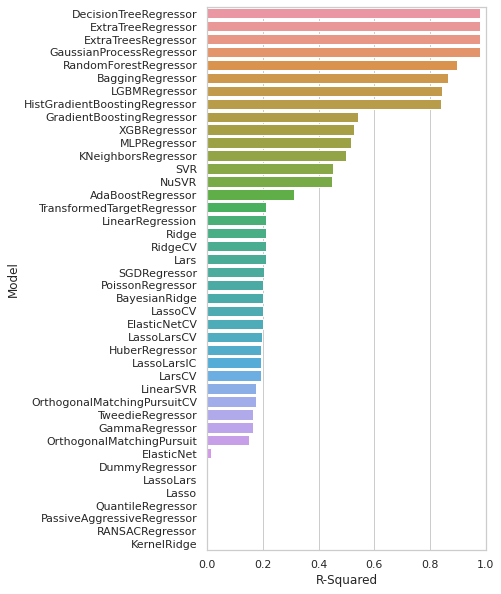

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

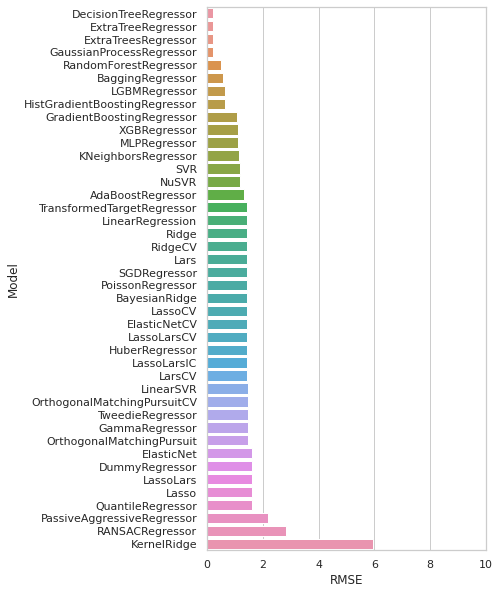

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

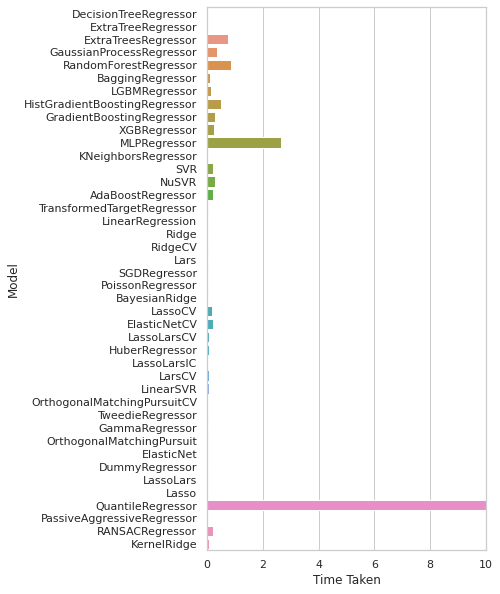

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [00:31<00:00,  1.14it/s]

[06:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:31<00:00,  1.31it/s]


Plot for test models

[(0.0, 1.0)]

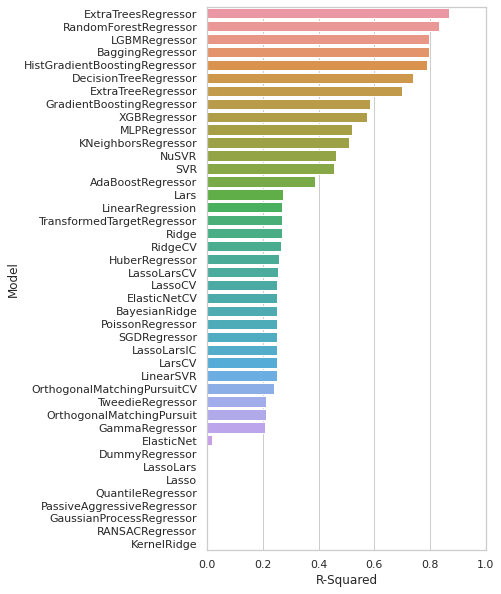

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

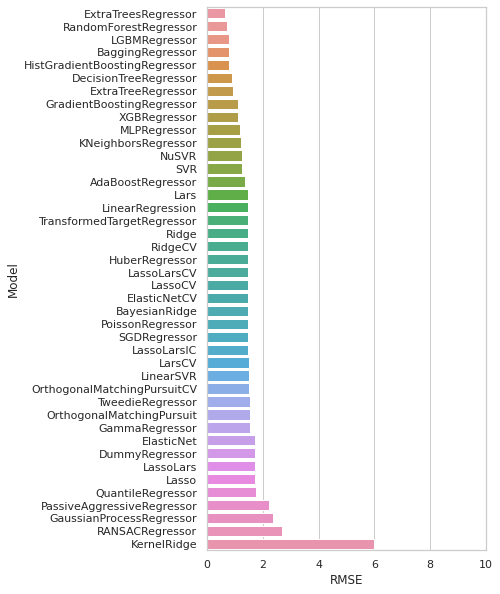

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

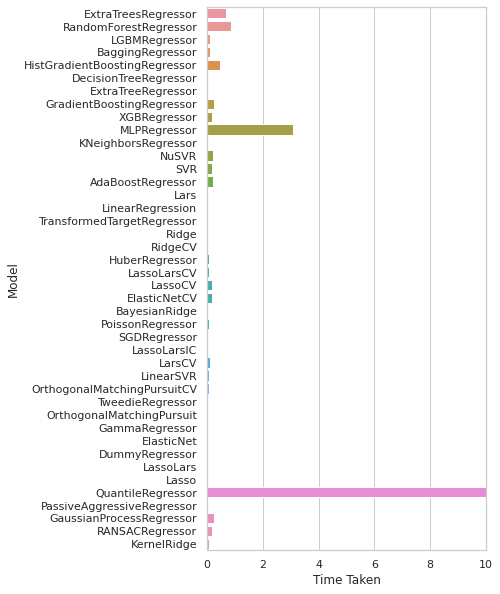

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="Time Taken", data=predictions_test)
ax.set(xlim=(0, 10))

Hyper parameter tuning - Extra Trees Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model = ExtraTreesRegressor()

In [ ]:
param_grid = {
    'n_estimators': [5,20,50,100,500,700],
    'criterion': ['squared_error','absolute_error'],
    'oob_score': [True, False],
    'max_features': ['auto','sqrt','log2'], 
    'bootstrap': [True,False],
    'warm_start': [True, False],
}

In [ ]:
gcv = GridSearchCV(model,param_grid,cv=5,n_jobs=-1)

In [ ]:
grid_result = gcv.fit(X_train, Y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.173351 using {'bootstrap': False, 'criterion': 'squared_error', 'max_features': 'log2', 'n_estimators': 100, 'oob_score': False, 'warm_start': False}


In [ ]:
model = ExtraTreesRegressor(**grid_result.best_params_,random_state=42)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [ ]:
model.get_params() 

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
print("R Squared:",r2)
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
Adj_r2 = 1-(1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted R2:",Adj_r2)
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(Y_test,Y_pred))
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(Y_test,Y_pred))
import numpy as np
print("RMSE:",np.sqrt(mean_squared_error(Y_test,Y_pred)))
from sklearn.metrics import mean_squared_log_error
print("RMSLE:",np.sqrt(mean_squared_log_error(Y_test,Y_pred)))

R Squared: 0.9011338518311295
Adjusted R2: 0.8977973388378638
MAE: 0.18763825503634646
MSE: 0.2509029673259817
RMSE: 0.5009021534451431
RMSLE: 0.07350022853470409


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

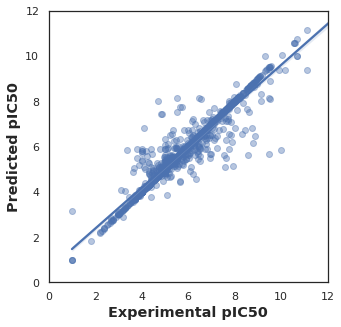

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

Feature Importance

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(level=0, inplace=True)
feature_importances = feature_importances.rename(columns={'index': 'Features', 'importance': 'Importance'})

In [ ]:
feature_importances['Importance percentage'] = (feature_importances['Importance'] / feature_importances['Importance'].sum()) * 100
feature_importances

,Features,Importance,Importance percentage
0,SubFPC2,0.073718,7.371763
1,SubFPC32,0.063696,6.369577
2,SubFPC302,0.046247,4.624714
3,SubFPC275,0.044823,4.482349
4,SubFPC274,0.044671,4.467148
5,SubFPC295,0.044607,4.460727
6,SubFPC301,0.044440,4.443977
7,SubFPC300,0.043446,4.344579
8,SubFPC307,0.040268,4.026837
9,SubFPC88,0.036158,3.615848


In [ ]:
feature_importances = feature_importances.head(10)
feature_importances

,Features,Importance,Importance percentage
0,SubFPC2,0.073718,7.371763
1,SubFPC32,0.063696,6.369577
2,SubFPC302,0.046247,4.624714
3,SubFPC275,0.044823,4.482349
4,SubFPC274,0.044671,4.467148
5,SubFPC295,0.044607,4.460727
6,SubFPC301,0.044440,4.443977
7,SubFPC300,0.043446,4.344579
8,SubFPC307,0.040268,4.026837
9,SubFPC88,0.036158,3.615848


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

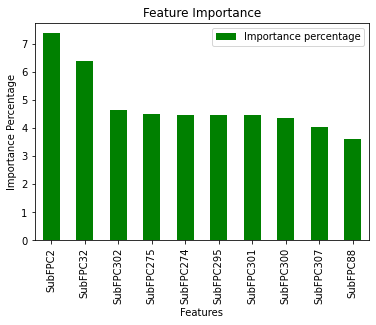

In [ ]:
feature_importances.plot(kind = 'bar',
        x = 'Features',
        y = 'Importance percentage',
        color = 'green')
x = feature_importances.Features
# set the title
plt.title('Feature Importance')
plt.xlabel("Features")
plt.ylabel("Importance Percentage")
# show the plot
plt.show()

Saving the model

In [ ]:
import pickle
pickle.dump(model, open('acetylcholinesterase_model_regressor.pkl', 'wb'))